In [8]:
import matplotlib.pyplot as plt
import numpy as np

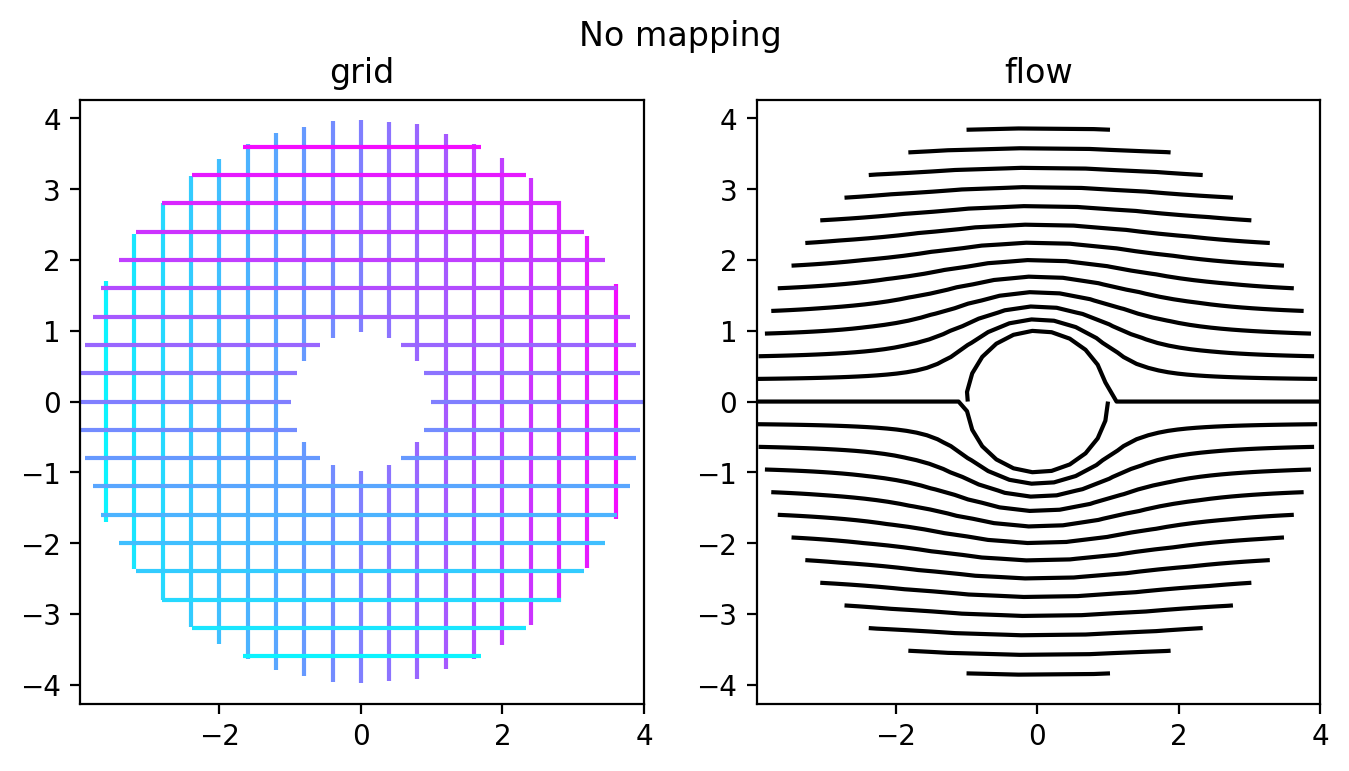

In [9]:
# Set up a polar grid of points
def polargrid():
    r = np.linspace(0.99,4,24)
    theta = np.linspace(0,2*np.pi,24)
    R,Theta = np.meshgrid(r,theta)
    return R*np.exp(1j*Theta)

def mapping_plot(mapping,z,z_map,Gamma=0):
    from numpy import real as R
    from numpy import imag as I
    plt.figure(figsize=(8,4),dpi=200)
    plt.suptitle(mapping)
    
    # Plot mapped grid
    plt.subplot(121)
    plt.title('grid')
    plt.contour(R(z_map),I(z_map),R(z),24,cmap=plt.cool())
    plt.contour(R(z_map),I(z_map),I(z),24)
    plt.axis('equal')

    # Plot mapped flow
    plt.subplot(122)
    plt.title('flow')
    psi = I(z+1/z+Gamma*2j*np.log(z)) # circle flow with circulation Gamma
    plt.contour(R(z_map),I(z_map),psi,24,colors='k',linestyles='solid')
    plt.axis('equal')
    plt.show()

z = polargrid()
mapping_plot('No mapping',z,z)

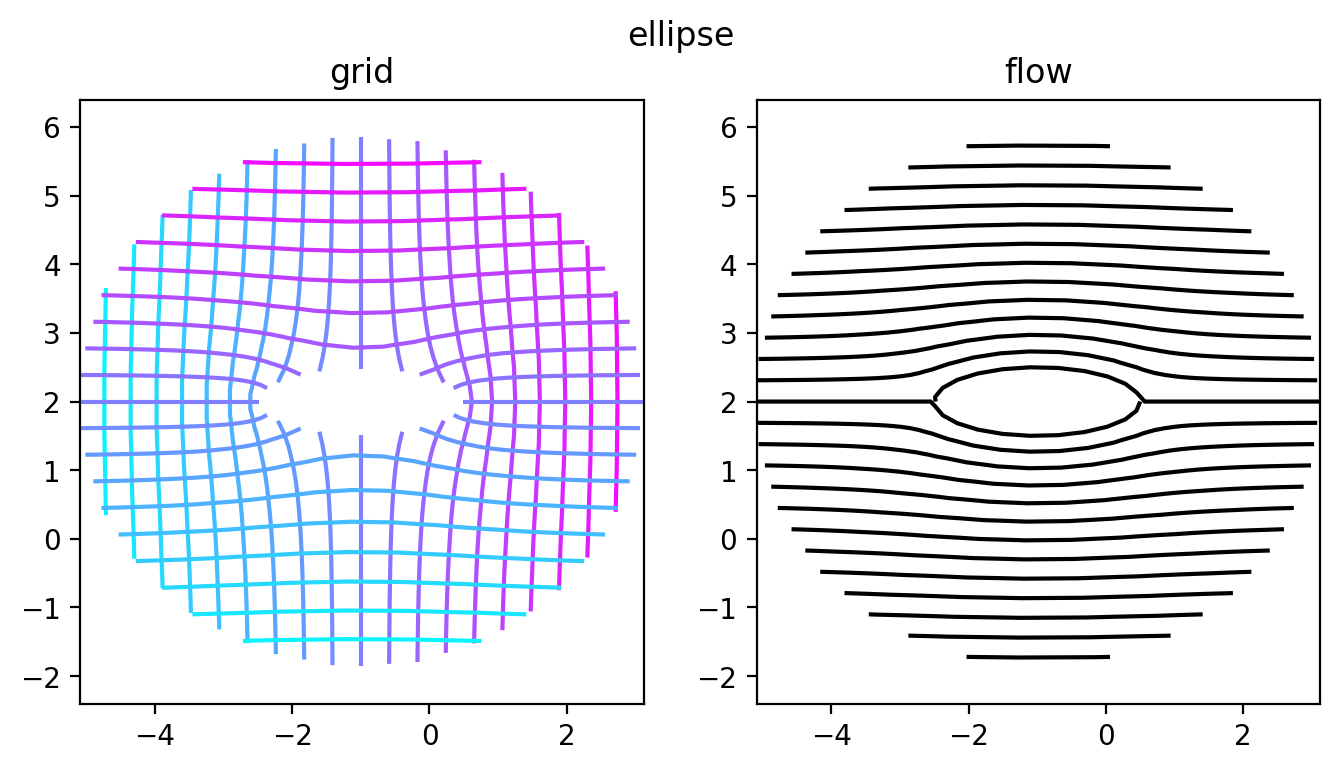

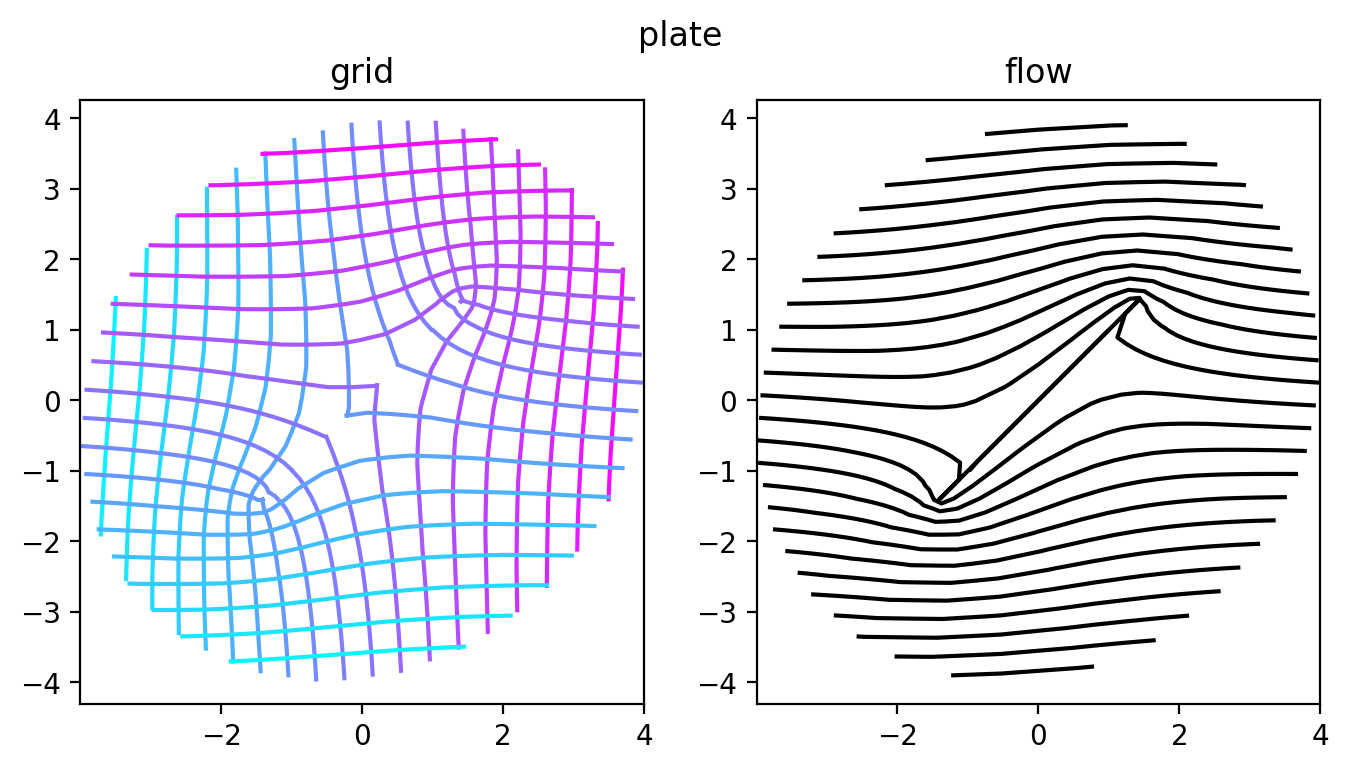

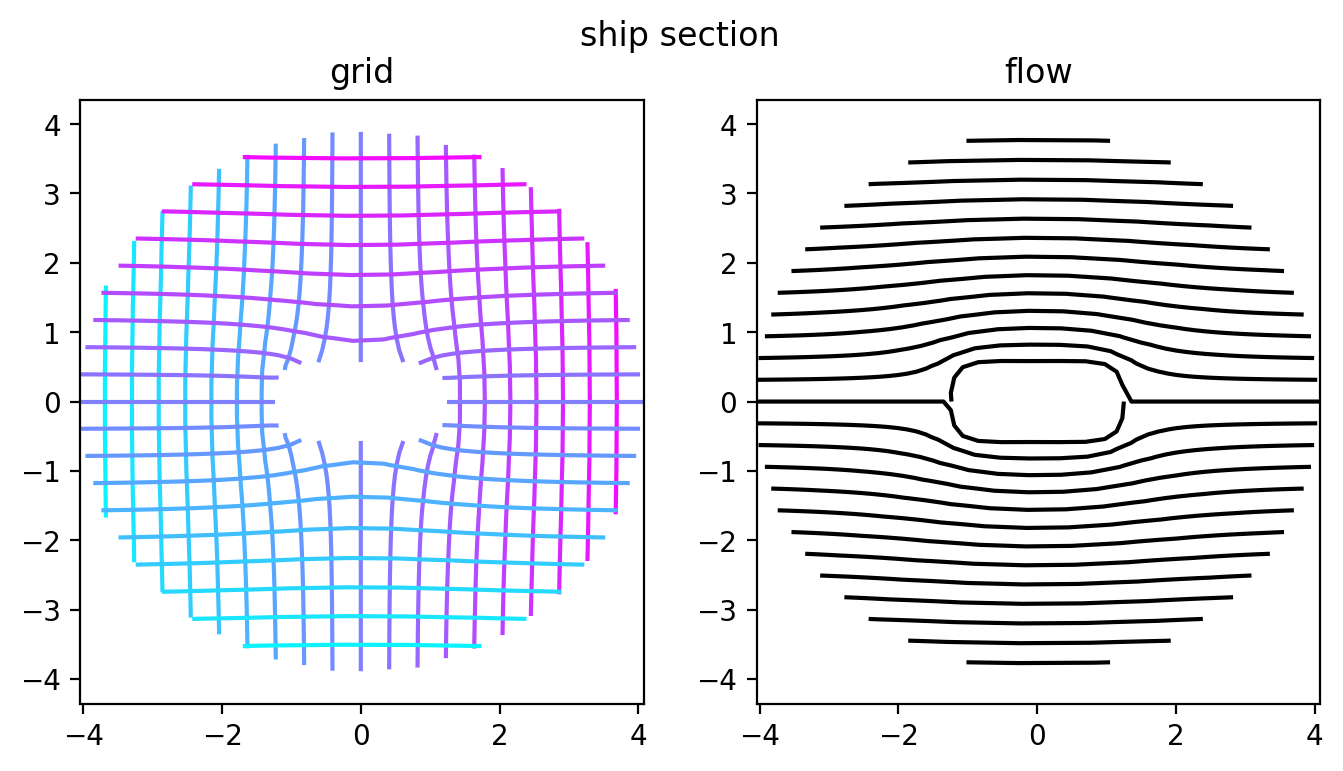

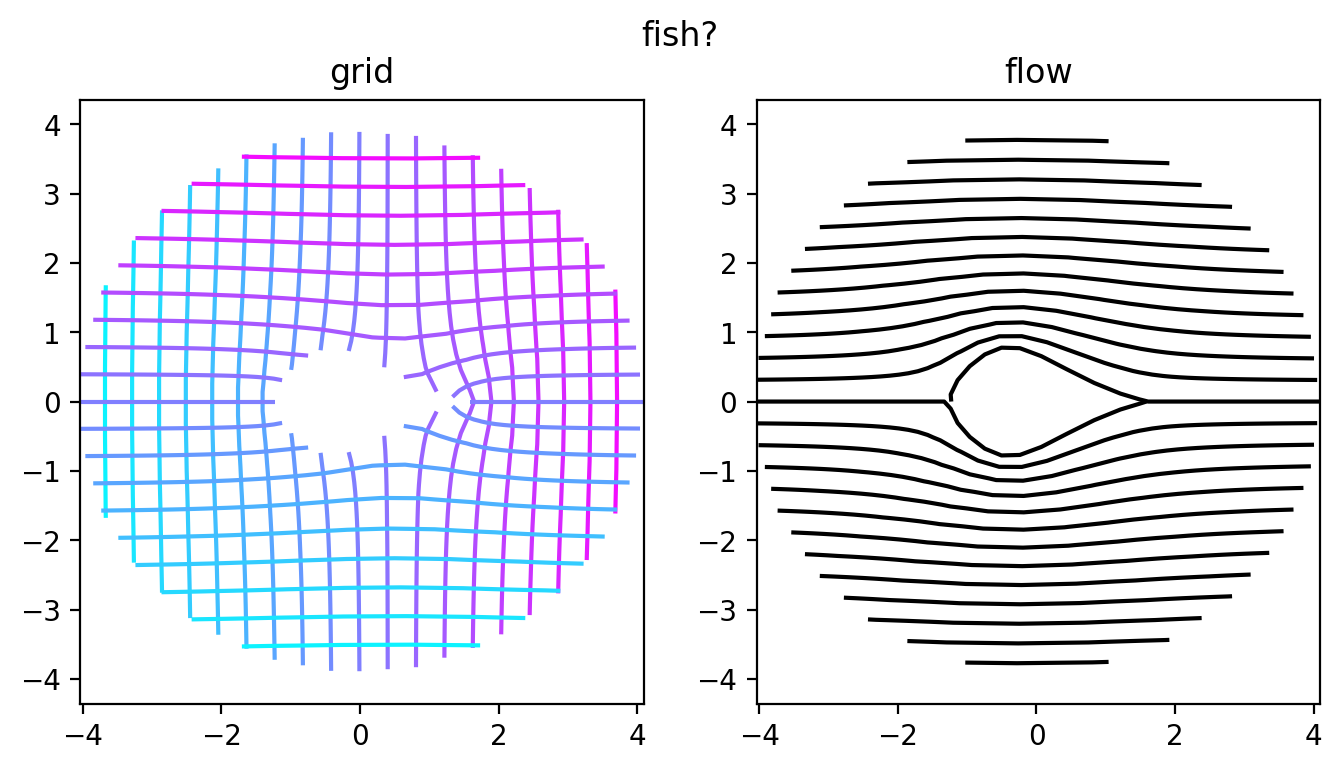

In [10]:
def Laurent(z,a):
    return z+sum([ai*z**(-i) for i,ai in enumerate(a)])

shapes = {'ellipse':[-1+2j,1/2],'plate':[0,1j],'ship section':[0,1/3,0,-1/12],'fish?':[0,1/3,1/6,1/12]}
for name,a in shapes.items():
    mapping_plot(name,z,Laurent(z,a))

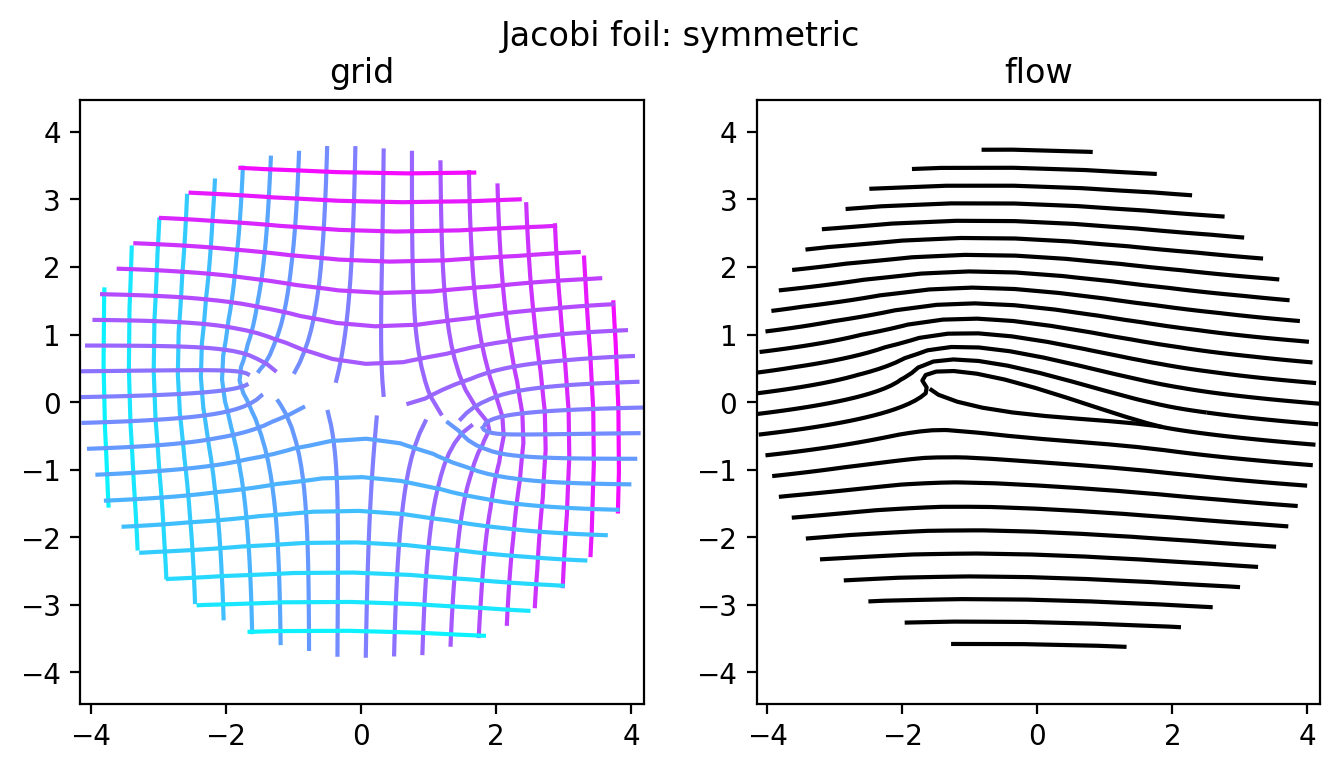

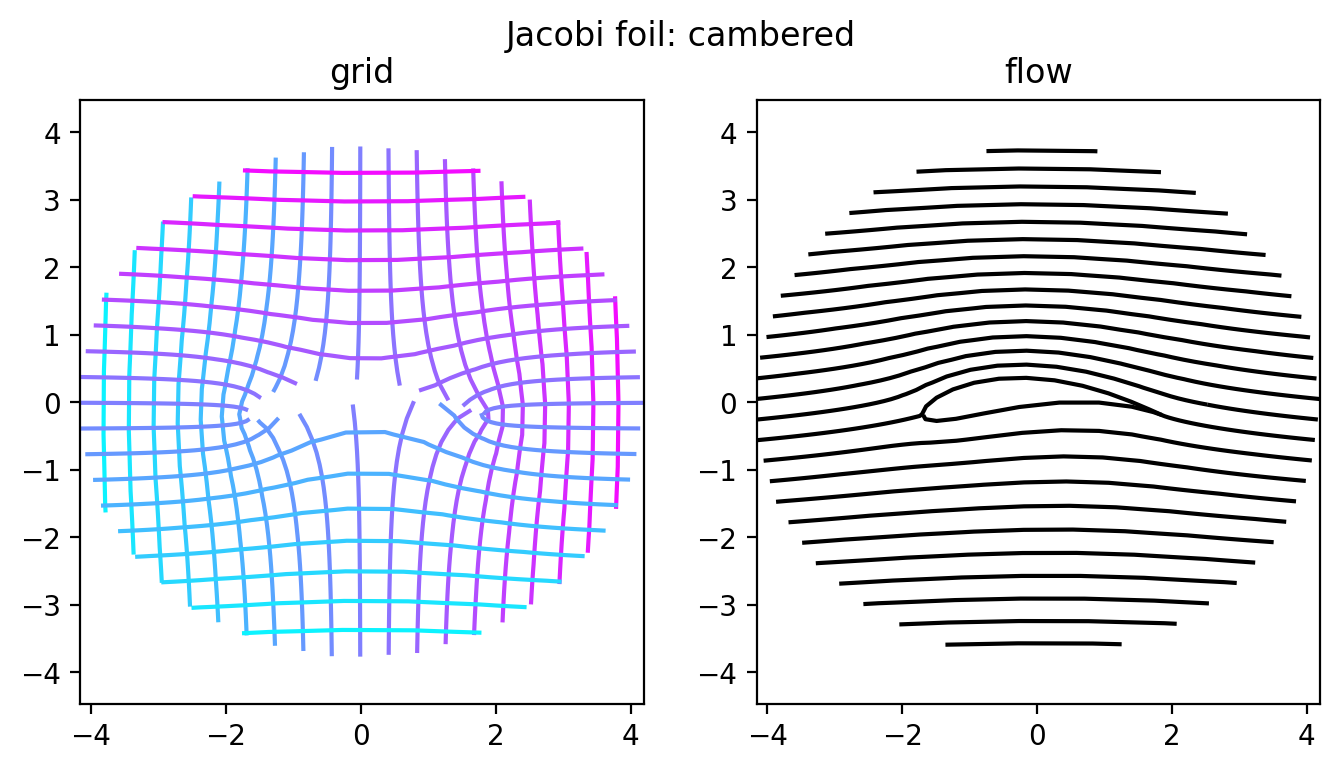

In [11]:
def Jacobi(d = 0.1,theta = np.pi/16, symmetric = False):
    if symmetric: 
        z0 = d*(1-1j*np.sin(theta))
    else:
        z0 = d-1j*np.sin(theta)
    return z+(np.exp(-1j*theta)-z0)**2/(z-z0)

for name,symmetric in {'symmetric':True,'cambered':False}.items():
    theta = np.pi/16
    mapping_plot('Jacobi foil: '+name,z,Jacobi(theta=theta, symmetric=symmetric), Gamma=theta)

NameError: name 'circ' is not defined

<Figure size 600x600 with 0 Axes>